In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import tkinter as tk
from tkinter import filedialog, messagebox
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score ,classification_report ,confusion_matrix

# 替换原来的文件路径
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)

# 显示前几行数据
data.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
data.isnull().values.any()

np.False_

In [ ]:
data['Sex'].value_counts()

,count
Sex,
1,183
0,87


In [ ]:
data['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


In [ ]:
missing_values = data.isnull().sum()

missing_values

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [ ]:
numerical_columns = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

mean_values = data[numerical_columns].mean()
print("Mean values of numerical columns:")
print(mean_values)

Mean values of numerical columns:
Age               54.433333
BP               131.344444
Cholesterol      249.659259
Max HR           149.677778
ST depression      1.050000
dtype: float64


In [ ]:
std_values = data[numerical_columns].std()
print("\nStandard deviation of numerical columns:")
print(std_values)


Standard deviation of numerical columns:
Age               9.109067
BP               17.861608
Cholesterol      51.686237
Max HR           23.165717
ST depression     1.145210
dtype: float64


In [ ]:
median_values = data[numerical_columns].median()
print("\nMedian values of numerical columns:")
print(median_values)


Median values of numerical columns:
Age               55.0
BP               130.0
Cholesterol      245.0
Max HR           153.5
ST depression      0.8
dtype: float64


In [ ]:
categorical_columns = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']

for col in categorical_columns:
    print(f"\nFrequency distribution for {col}:")
    print(data[col].value_counts())

print("\nStatistical Summary:")
print(data.describe())


Frequency distribution for Sex:
Sex
1    183
0     87
Name: count, dtype: int64

Frequency distribution for Chest pain type:
Chest pain type
4    129
3     79
2     42
1     20
Name: count, dtype: int64

Frequency distribution for FBS over 120:
FBS over 120
0    230
1     40
Name: count, dtype: int64

Frequency distribution for EKG results:
EKG results
2    137
0    131
1      2
Name: count, dtype: int64

Frequency distribution for Exercise angina:
Exercise angina
0    181
1     89
Name: count, dtype: int64

Frequency distribution for Slope of ST:
Slope of ST
1    130
2    122
3     18
Name: count, dtype: int64

Frequency distribution for Number of vessels fluro:
Number of vessels fluro
0    160
1     58
2     33
3     19
Name: count, dtype: int64

Frequency distribution for Thallium:
Thallium
3    152
7    104
6     14
Name: count, dtype: int64

Frequency distribution for Heart Disease:
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

Statistical Summary:
    

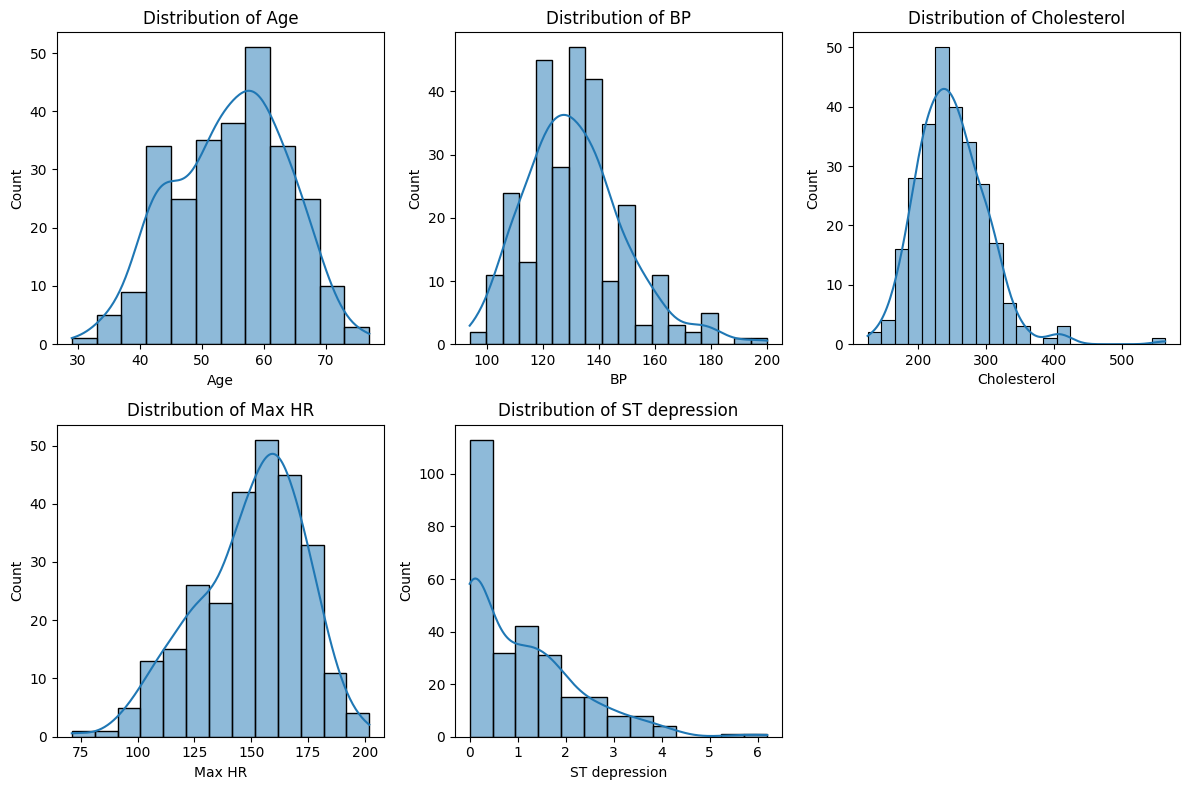

In [ ]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [ ]:
data.rename(columns={
    "Chest pain type": "ChestPainType",
    "BP": "RestingBloodPressure",
    "Cholesterol": "SerumCholesterol",
    "FBS over 120": "FastingBloodSugarOver120",
    "EKG results": "RestingECGResult",
    "Max HR": "MaxHeartRate",
    "Exercise angina": "ExerciseInducedAngina",
    "ST depression": "ST_Depression",
    "Slope of ST": "ST_Slope",
    "Number of vessels fluro": "NumberOfMajorVessels",
    "Thallium": "Thallium",
}, inplace=True)

# 显示前几行数据
data.head()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugarOver120,RestingECGResult,MaxHeartRate,ExerciseInducedAngina,ST_Depression,ST_Slope,NumberOfMajorVessels,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
#Encoding Categorical Variables
le = LabelEncoder()

data['Heart Disease'] = le.fit_transform(data['Heart Disease'])

data.head()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugarOver120,RestingECGResult,MaxHeartRate,ExerciseInducedAngina,ST_Depression,ST_Slope,NumberOfMajorVessels,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
# Normalizing Numerical Columns
scaler = StandardScaler()

numerical_columns = ['Age', 'RestingBloodPressure', 'SerumCholesterol', 'MaxHeartRate', 'ST_Depression']

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data.head()


,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugarOver120,RestingECGResult,MaxHeartRate,ExerciseInducedAngina,ST_Depression,ST_Slope,NumberOfMajorVessels,Thallium,Heart Disease
0,1.712094,1,4,-0.075410,1.402212,0,2,-1.759208,0,1.181012,2,3,3,1
1,1.382140,0,3,-0.916759,6.093004,0,2,0.446409,0,0.481153,2,0,7,0
2,0.282294,1,2,-0.411950,0.219823,0,0,-0.375291,0,-0.656118,1,0,7,1
3,1.052186,1,4,-0.187590,0.258589,0,0,-1.932198,1,-0.743600,2,1,7,0
4,2.152032,0,2,-0.636310,0.374890,0,2,-1.240239,1,-0.743600,1,1,3,0


In [ ]:
# Correlation Matrix Analysis
correlation_matrix = data.corr()
correlation_matrix

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugarOver120,RestingECGResult,MaxHeartRate,ExerciseInducedAngina,ST_Depression,ST_Slope,NumberOfMajorVessels,Thallium,Heart Disease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
ChestPainType,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
RestingBloodPressure,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
SerumCholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FastingBloodSugarOver120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
RestingECGResult,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
MaxHeartRate,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
ExerciseInducedAngina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST_Depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


In [ ]:
# Train-Test Split
X = data.drop(columns=['Heart Disease'])
y = data['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 13), (54, 13), (216,), (54,))

In [ ]:
# Feature Scaling for Model Training
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(X_train_scaled.shape, X_test_scaled.shape)
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled testing data shape:", X_test_scaled.shape)

Scaled training data shape: (216, 13)
Scaled testing data shape: (54, 13)


In [ ]:
# Model Training & Evaluation

# --- Logistic Regression ---
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)
logistic_y_pred = logistic_model.predict(X_test_scaled)
# logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_metrics = {
    'Accuracy': accuracy_score(y_test, logistic_y_pred),
    'Precision': precision_score(y_test, logistic_y_pred),
    'Recall': recall_score(y_test, logistic_y_pred),
    'F1 Score': f1_score(y_test, logistic_y_pred)
}

# --- Support Vector Machine (SVM) ---
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_y_pred = svm_model.predict(X_test_scaled)
# svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_metrics = {
    'Accuracy': accuracy_score(y_test, svm_y_pred),
    'Precision': precision_score(y_test, svm_y_pred),
    'Recall': recall_score(y_test, svm_y_pred),
    'F1 Score': f1_score(y_test, svm_y_pred)
}

# --- XGBoost Classifier ---
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=10)
xgb_model.fit(X_train_scaled, y_train)
xgb_y_pred = xgb_model.predict(X_test_scaled)
# xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_metrics = {
    'Accuracy': accuracy_score(y_test, xgb_y_pred),
    'Precision': precision_score(y_test, xgb_y_pred),
    'Recall': recall_score(y_test, xgb_y_pred),
    'F1 Score': f1_score(y_test, xgb_y_pred)
}

# --- Random Forest Classifier ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)
rf_metrics = {
    'Accuracy': accuracy_score(y_test, rf_y_pred),
    'Precision': precision_score(y_test, rf_y_pred),
    'Recall': recall_score(y_test, rf_y_pred),
    'F1 Score': f1_score(y_test, rf_y_pred)
}

# --- Decision Tree Classifier ---
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_y_pred = dt_model.predict(X_test_scaled)
dt_metrics = {
    'Accuracy': accuracy_score(y_test, dt_y_pred),
    'Precision': precision_score(y_test, dt_y_pred),
    'Recall': recall_score(y_test, dt_y_pred),
    'F1 Score': f1_score(y_test, dt_y_pred)
}

# model_accuracies = {
#     'Logistic Regression': logistic_accuracy,
#     'SVM': svm_accuracy,
#     'XGBoost': xgb_accuracy
# }

# results = pd.DataFrame({'Model': model_accuracies.keys(), 'Accuracy': model_accuracies.values()})
# print(results)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:29:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# # Comparing Model Performance¶
# results = pd.DataFrame({'Model': model_accuracies.keys(), 'Accuracy': model_accuracies.values()})
# results

# 显示模型评估结果
print("=== Logistic Regression ===")
for k, v in logistic_metrics.items():
    print(f"{k}: {v:.4f}")

print("\n=== SVM ===")
for k, v in svm_metrics.items():
    print(f"{k}: {v:.4f}")

print("\n=== XGBoost ===")
for k, v in xgb_metrics.items():
    print(f"{k}: {v:.4f}")

print("\n=== Random Forest ===")
for k, v in rf_metrics.items():
    print(f"{k}: {v:.4f}")

print("\n=== Decision Tree ===")
for k, v in dt_metrics.items():
    print(f"{k}: {v:.4f}")

=== Logistic Regression ===
Accuracy: 0.9074
Precision: 0.9000
Recall: 0.8571
F1 Score: 0.8780

=== SVM ===
Accuracy: 0.8889
Precision: 0.8947
Recall: 0.8095
F1 Score: 0.8500

=== XGBoost ===
Accuracy: 0.8704
Precision: 0.8500
Recall: 0.8095
F1 Score: 0.8293

=== Random Forest ===
Accuracy: 0.7593
Precision: 0.7222
Recall: 0.6190
F1 Score: 0.6667

=== Decision Tree ===
Accuracy: 0.6852
Precision: 0.5769
Recall: 0.7143
F1 Score: 0.6383


In [ ]:
# report = classification_report(y_test, logistic_y_pred, target_names=['Absence', 'Presence'])
# svm_report = classification_report(y_test, svm_y_pred, target_names=['Absence', 'Presence'])
# xgb_report = classification_report(y_test, xgb_y_pred, target_names=['Absence', 'Presence'])


# print(report)
# print("=======================================================")
# print(svm_report)
# print("=======================================================")
# print(xgb_report)

<ipython-input-315-995d5a6a02cc>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results, palette='Set2')
<ipython-input-315-995d5a6a02cc>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results, palette='Set2')
<ipython-input-315-995d5a6a02cc>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results, palette='Set2')
<ipython-input-315-995d5a6a02cc>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

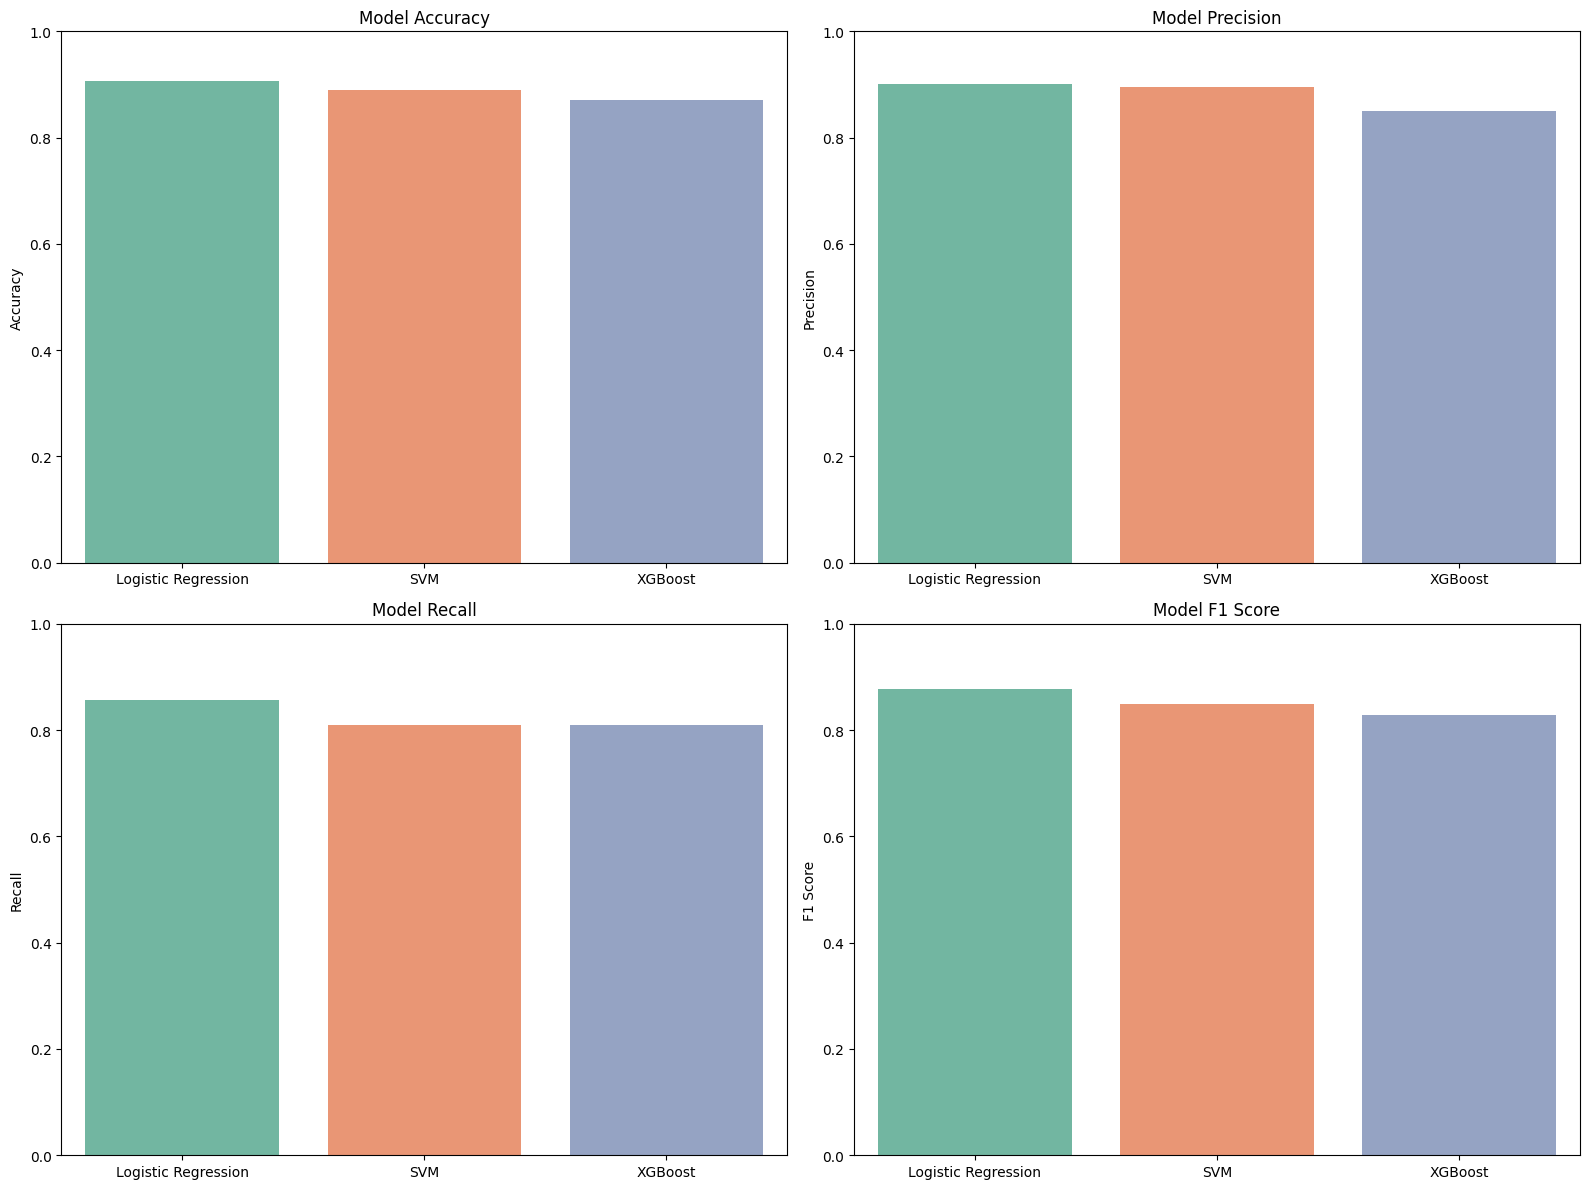

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 构建模型评估结果表，包含所有五个模型
results = pd.DataFrame([
    {'Model': 'Logistic Regression', **logistic_metrics},
    {'Model': 'SVM', **svm_metrics},
    {'Model': 'XGBoost', **xgb_metrics},
    # {'Model': 'Random Forest', **rf_metrics},
    # {'Model': 'Decision Tree', **dt_metrics}
])

# 定义评估指标
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# 设置画布大小
plt.figure(figsize=(16, 12))

# 绘制每个指标的条形图
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Model', y=metric, data=results, palette='Set2')
    plt.title(f'Model {metric}')
    plt.ylim(0, 1)  # 设置y轴范围为 [0, 1]
    plt.xlabel('')
    plt.ylabel(metric)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


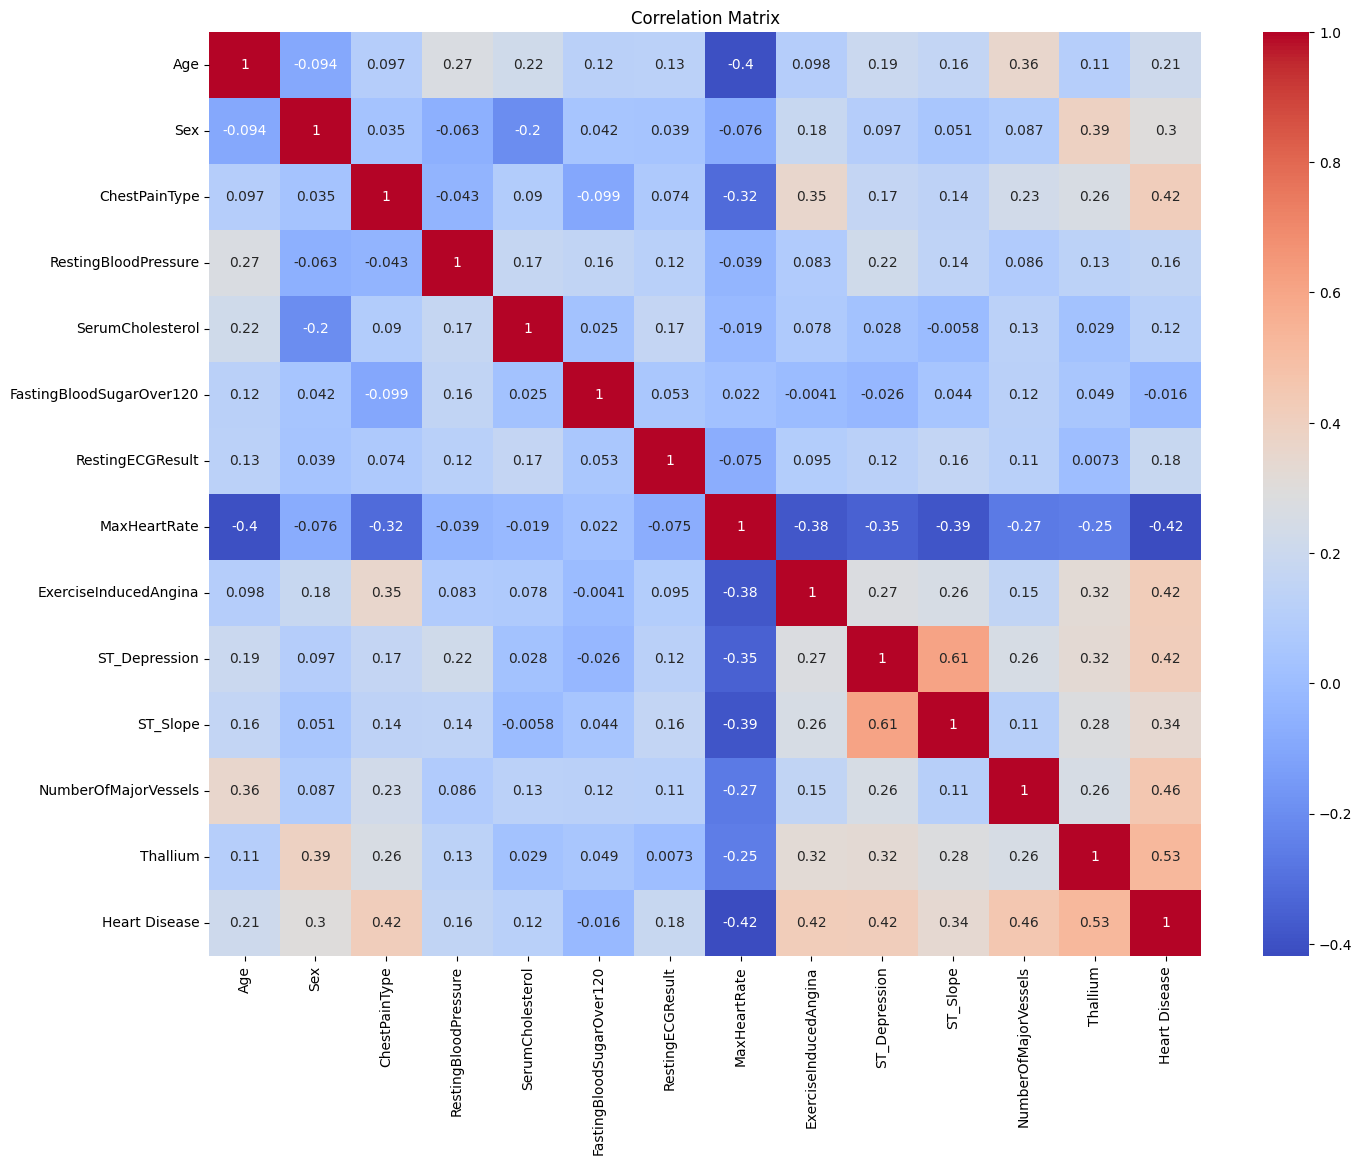

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import joblib
import pickle

# 保存 scaler 和模型
joblib.dump(scaler, 'HeartDiseaseLRScaler.pkl')  # 保存 scaler
joblib.dump(logistic_model, 'HeartDisease_Logistic.pkl')  # 保存 Logistic Regression 模型

# 保存其他模型
joblib.dump(svm_model, 'HeartDisease_SVM.pkl')  # 保存 SVM 模型
joblib.dump(xgb_model, 'HeartDisease_XGBoost.pkl')  # 保存 XGBoost 模型
joblib.dump(rf_model, 'HeartDisease_RandomForest.pkl')  # 保存 Random Forest 模型
joblib.dump(dt_model, 'HeartDisease_DecisionTree.pkl')  # 保存 Decision Tree 模型

print("✅ 模型和Scaler已保存：")
print("- HeartDisease_Logistic.pkl（包含Scaler和模型）")
print("- HeartDisease_SVM.pkl")
print("- HeartDisease_XGBoost.pkl")
print("- HeartDisease_RandomForest.pkl")
print("- HeartDisease_DecisionTree.pkl")




✅ 模型和Scaler已保存：
- HeartDisease_Logistic.pkl（包含Scaler和模型）
- HeartDisease_SVM.pkl
- HeartDisease_XGBoost.pkl
- HeartDisease_RandomForest.pkl
- HeartDisease_DecisionTree.pkl


In [2]:
import joblib
import pandas as pd

# 自定义标签编码
heart_label_encodings = {
    'Sex': {'Female': 0, 'Male': 1},
    'ChestPainType': {
        'Typical Angina': 1,
        'Atypical Angina': 2,
        'Non-Anginal Pain': 3,
        'Asymptomatic': 4
    },
    'FastingBloodSugarOver120': {'False': 0, 'True': 1},
    'RestingECGResult': {
        'Normal': 0,
        'ST-T Abnormality': 1,
        'Left Ventricular Hypertrophy': 2
    },
    'ExerciseInducedAngina': {'No': 0, 'Yes': 1},
    'ST_Slope': {
        'Upsloping': 1,
        'Flat': 2,
        'Downsloping': 3
    },
    'Thallium': {
        'Normal': 3,
        'Fixed Defect': 6,
        'Reversible Defect': 7
    }
}

# 加载模型和标准化器
logistic_model = joblib.load('HeartDisease_Logistic.pkl')  # 加载已训练的模型
scaler1 = joblib.load('HeartDiseaseLRScaler.pkl')  # 加载标准化器

# 假设你已经有一个新的数据（例如一个新的样本
new_data = pd.DataFrame({
    'Age': [70],
    'Sex': ['Male'],
    'ChestPainType': ['Asymptomatic'],
    'RestingBloodPressure': [130],
    'SerumCholesterol': [322],
    'FastingBloodSugarOver120': ['False'],
    'RestingECGResult': ['ST-T Abnormality'],
    'MaxHeartRate': [109],
    'ExerciseInducedAngina': ['No'],
    'ST_Depression': [2.4],
    'ST_Slope': ['Flat'],
    'NumberOfMajorVessels':[3],
    'Thallium': ['Normal']
})
# new_data = pd.DataFrame({
#     'Age': [67],
#     'Sex': ['Female'],
#     'ChestPainType': ['Non-Anginal Pain'],
#     'RestingBloodPressure': [115],
#     'SerumCholesterol': [564],
#     'FastingBloodSugarOver120': ['False'],
#     'RestingECGResult': ['Left Ventricular Hypertrophy'],
#     'MaxHeartRate': [160],
#     'ExerciseInducedAngina': ['No'],
#     'ST_Depression': [1.6],
#     'ST_Slope': ['Flat'],
#     'NumberOfMajorVessels': [0],
#     'Thallium': ['Reversible Defect']
# })

# 使用自定义的编码映射进行编码
for col, encoding in heart_label_encodings.items():
    if col in new_data.columns and isinstance(new_data[col].iloc[0], str):  # 确保该列是字符串类型
        new_data[col] = new_data[col].map(encoding)

# 如果有无法匹配的值，填充 NaN 或处理
new_data.fillna(0, inplace=True)  # 或者根据需要处理

print("编码后的新数据：")
print(new_data)

# 使用训练时拟合的标准化器对数值列进行标准化
new_data_scaled = scaler1.transform(new_data)
print(new_data_scaled)

# 使用训练好的 Logistic Regression 模型进行预测
logistic_pred = logistic_model.predict(new_data_scaled)

# 输出预测结果
print("新样本的预测结果：", logistic_pred)

编码后的新数据：
   Age  Sex  ChestPainType  RestingBloodPressure  SerumCholesterol  \
0   70    1              4                   130               322   

   FastingBloodSugarOver120  RestingECGResult  MaxHeartRate  \
0                         0                 1           109   

   ExerciseInducedAngina  ST_Depression  ST_Slope  NumberOfMajorVessels  \
0                      0            2.4         2                     3   

   Thallium  
0         3  
[[ 3.66154027e+02  6.56097231e-01  1.87238411e+00  7.70376984e+02
   2.74690440e+03 -3.93802252e-01 -3.72354912e-02  6.22193295e+02
  -7.36788398e-01  1.17309309e+01  2.30559959e+00  2.41413530e+00
   2.23656667e+00]]
新样本的预测结果： [1]
